In [1]:
import csv
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import imageio

# Happy FRS

In [2]:
first = np.loadtxt("happyfrsfirst.csv", delimiter=",")
display(first)

second = np.loadtxt("happyfrssecond.csv", delimiter=",")
display(second)

third = np.loadtxt("happyfrsthird.csv", delimiter=",")
display(third)

array([[ 5.17150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 5.18150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 5.19150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.71415000e+02, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.71515000e+02, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.71615000e+02, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00]])

array([[ 5.17150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.18150000e+01, -1.55407044e-02,  3.28876411e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.19150000e+01,  2.20374170e-03,  5.04978098e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 6.25150000e+01,  1.90000040e+00,  1.90000040e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.26150000e+01,  1.95000040e+00,  1.95000040e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.27150000e+01,  2.00000000e+00,  2.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

array([ 5.17150000e+01, -4.99996282e-02,  3.72529030e-07,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

[2. 2.]
[[-35. -35.]
 [-35. -35.]]
[-4.99996282e-02  3.72529030e-07]
[[1. 0.]
 [0. 1.]]


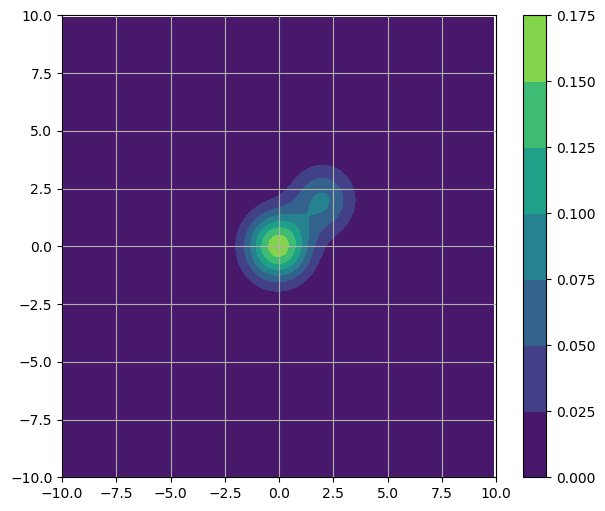

In [3]:
# Visualize setup
fig, ax = plt.subplots(figsize=(7,6))
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.grid()

ts = third[0]
viz = np.mgrid[-10:10:.1, -10:10:.1]
print(second[-1,1:3])
print(np.vstack((second[-1,5:7],second[-1,9:11])))
no_fault = multivariate_normal(mean=second[-1,1:3], cov=np.eye(2))
print(third[1:3])
print(np.vstack((third[5:7],third[9:11])))
fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))
img = (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1]))) + \
      (1-ts*.01) * no_fault.pdf(np.dstack((viz[0], viz[1]))) + (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1])))
plt.contourf(viz[0],viz[1],img, vmin=0,vmax=.2)
plt.colorbar()
    
plt.show()

In [4]:
print(second[:,1:3])

[[-4.99996282e-02  3.72529030e-07]
 [-1.55407044e-02  3.28876411e-02]
 [ 2.20374170e-03  5.04978098e-02]
 [ 1.99558172e-02  6.81003491e-02]
 [ 3.77139961e-02  8.56967849e-02]
 [ 5.54599681e-02  1.03305428e-01]
 [ 7.32120435e-02  1.20909493e-01]
 [ 9.09686966e-02  1.38507455e-01]
 [ 1.08716194e-01  1.56116098e-01]
 [ 1.26466744e-01  1.73718637e-01]
 [ 1.44223397e-01  1.91318124e-01]
 [ 1.61972421e-01  2.08925241e-01]
 [ 1.79724496e-01  2.26527781e-01]
 [ 1.97481149e-01  2.44125742e-01]
 [ 2.15230173e-01  2.61731333e-01]
 [ 2.32983774e-01  2.79332347e-01]
 [ 2.50909800e-01  2.96759410e-01]
 [ 2.68657298e-01  3.14366527e-01]
 [ 2.86415477e-01  3.31962963e-01]
 [ 3.04291149e-01  3.49440380e-01]
 [ 3.22043224e-01  3.67042920e-01]
 [ 3.39810558e-01  3.84630200e-01]
 [ 3.57565685e-01  4.02229688e-01]
 [ 3.75337597e-01  4.19813916e-01]
 [ 3.93121716e-01  4.37384412e-01]
 [ 4.10899732e-01  4.54961012e-01]
 [ 4.28689954e-01  4.72525404e-01]
 [ 4.46490858e-01  4.90077589e-01]
 [ 4.64288710e-01  5

In [54]:
def gen_frame(j):
    # Visualize setup
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    ax.grid()

    ts = second[j,0]
    viz = np.mgrid[-5:5:.1, -5:5:.1]
    no_fault = multivariate_normal(mean=second[j,1:3], cov=np.eye(2))
    fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))
    img = (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1]))) + \
          (1-ts*.01) * no_fault.pdf(np.dstack((viz[0], viz[1]))) + (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1])))
    plt.contourf(viz[0],viz[1],img,vmin=0,vmax=.3)
    plt.colorbar()

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close("all")
    print(j)
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
#final version should be 90x160px
imageio.mimsave('./frs.gif', [gen_frame(j) for j in range(len(second))], fps=10) #len(Ps[:,0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


# Calibration

In [6]:
calodom = np.loadtxt("calodom.csv", delimiter=",")
display(calodom.shape)

caltraj = np.loadtxt("caltraj.csv", delimiter=",")
display(caltraj.shape)

calsplit = np.loadtxt("calsplit.txt", delimiter=",")
display(calsplit.shape)

(6, 1200)

(6, 400)

(3,)

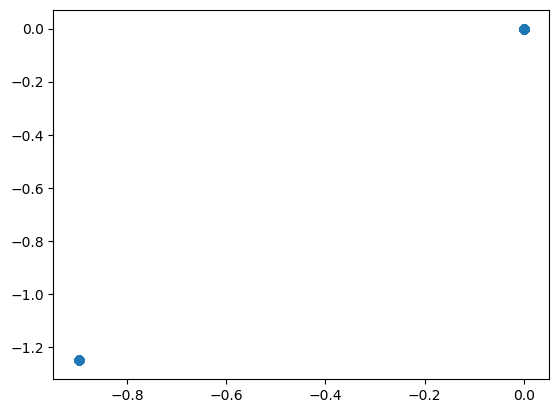

In [37]:
sim = 0
plt.figure()
plt.scatter(calodom[sim*2,:],calodom[sim*2+1,:])
#plt.scatter(caltraj[sim*2],caltraj[sim*2+1])
plt.show()

In [53]:
n_sim = 3
normdata = np.zeros((3,400,2))
covslists = []

for i in range(n_sim):
    for sim in range(i):
        for t in range(int(calsplit[sim])):
            trajx = caltraj[sim*2,t]
            trajy = caltraj[sim*2+1,t]
            odomx = calodom[sim*2,t*3]
            odomy = calodom[sim*2+1,t*3]
            normdata[sim,t] = (np.array([trajx,trajy]) - np.array([odomx,odomy]))
    covs = []
    for t in range(400):
        current = normdata[:,t,:]
        current = current[np.any(current,axis=1)]
        covs.append(np.cov(normdata[:,t,:].T,ddof=0))
    covslists.append(np.array(covs))
    
covslists = np.array(covslists)

linedata = np.zeros((3,400,2))
covslistsline = []

for i in range(n_sim):
    for sim in range(i):
        for t in range(int(400-calsplit[sim])):
            trajx = caltraj[sim*2,int(calsplit[sim]+t)]
            trajy = caltraj[sim*2+1,int(calsplit[sim]+t)]
            odomx = calodom[sim*2,int(calsplit[sim]+t)*3]
            odomy = calodom[sim*2+1,int(calsplit[sim]+t)*3]
            linedata[sim,int(calsplit[sim]+t)] = (np.array([trajx,trajy]) - np.array([odomx,odomy]))
    covs = []
    for t in range(400):
        current = linedata[:,t,:]
        current = current[np.any(current,axis=1)]
        covs.append(np.cov(linedata[:,t,:].T,ddof=0))
    covslistsline.append(np.array(covs))
    
covslistsline = np.array(covslists)

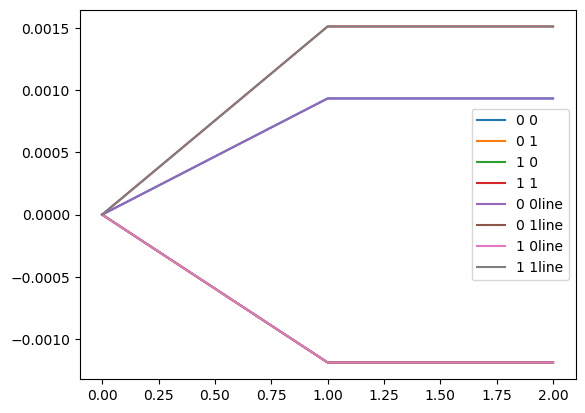

In [64]:
plt.figure()
for i in range(2):
    for j in range(2):
        plt.plot(covslists[:,20,i,j],label=str(i)+" "+str(j))
for i in range(2):
    for j in range(2):
        plt.plot(covslistsline[:,20,i,j],label=str(i)+" "+str(j)+"line")
plt.legend()
plt.show()

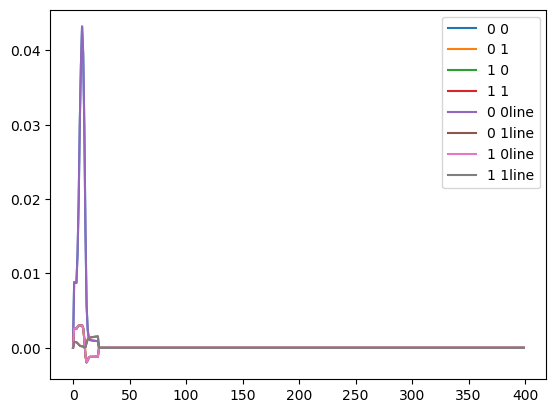

In [70]:
plt.figure()
for i in range(2):
    for j in range(2):
        plt.plot(covslists[-1,:,i,j],label=str(i)+" "+str(j))
for i in range(2):
    for j in range(2):
        plt.plot(covslistsline[-1,:,i,j],label=str(i)+" "+str(j)+"line")
plt.legend()
plt.show()